### Heart Failure analysis and detection using Machine Learning techniques

In [37]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
## Read the data

In [39]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [40]:
# Basic information about the dataset

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [42]:
data.shape

(918, 12)

#### There are 918 rows and 12 columns

In [43]:
data.size

11016

#### The size of the dataset is 11016.
- 11 colums
- 6 integer feature
- 1 float value
- 4 object data ( categorical data)


#### Check null values

In [44]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

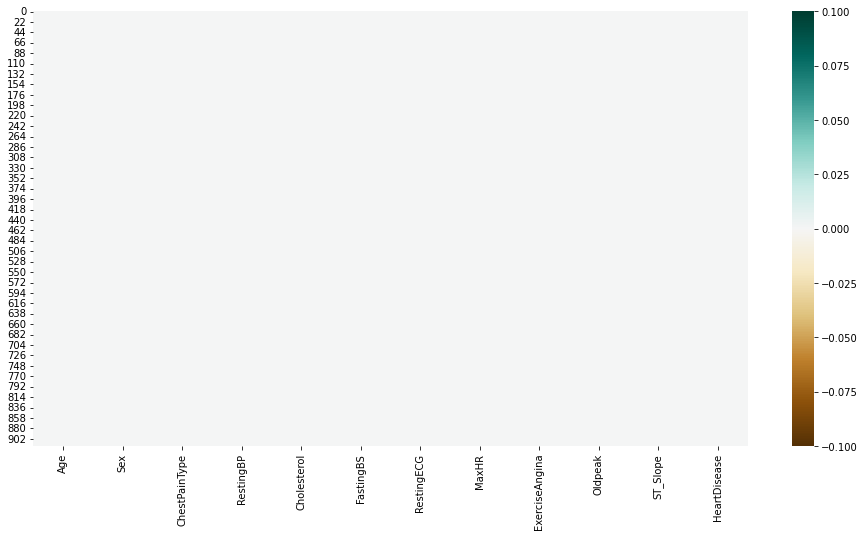

In [45]:
### visualize in the heatmap
plt.figure(figsize = (16,8))
sns.heatmap(data.isna(),cmap='BrBG')

In [46]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Data analysis

In [47]:
# analyze sex

In [48]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

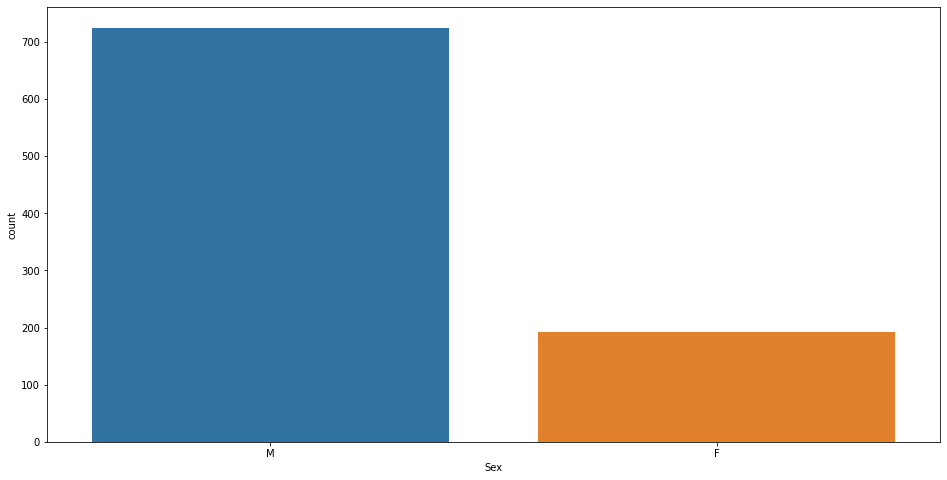

In [49]:
plt.figure(figsize = (16,8))
sns.countplot(data['Sex'])

#### According to this dataset, which gender suffered more from heart disease?

In [50]:
tot = data['HeartDisease'].groupby(data['Sex']).count()
suff = data['HeartDisease'].groupby(data['Sex']).sum()
not_suf = tot-suff
not_suf

Sex
F    143
M    267
Name: HeartDisease, dtype: int64

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

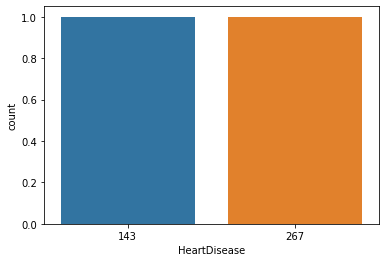

In [51]:
sns.countplot(not_suf)

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

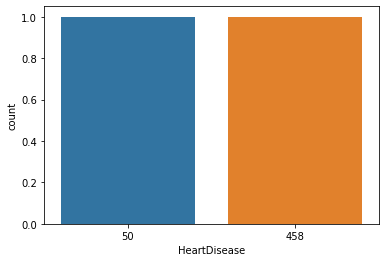

In [52]:
sns.countplot(suff)

In [53]:
female_suffered = suff[0]
male_suffered = suff[1]


In [54]:
total_gend = data['Sex'].count()
print("Female suffered percent ", (female_suffered/total_gend)*100)

Female suffered percent  5.446623093681917


In [55]:
total_gend = data['Sex'].count()
print("Male suffered percent ", (male_suffered/total_gend)*100)

Male suffered percent  49.89106753812636


#### Analyze the chest pain type

In [56]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

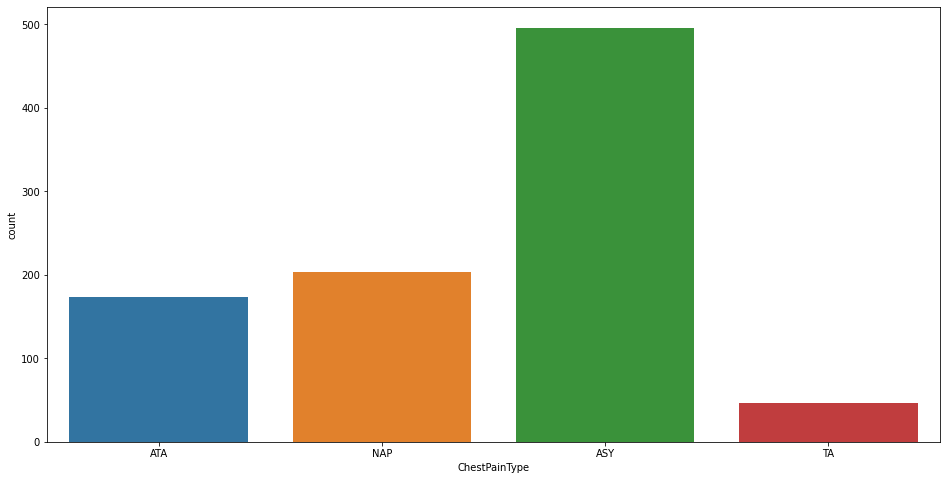

In [57]:
plt.figure(figsize = (16,8))
sns.countplot(data['ChestPainType'
])

In [58]:
count_me = data['HeartDisease'].groupby(data['ChestPainType']).count()

In [59]:
sum_me = data['HeartDisease'].groupby(data['ChestPainType']).sum()

In [60]:
sum_me

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

In [61]:
no_risk = count_me-sum_me

In [62]:
print("{} of people who have ASY got heart disease and {} of people who have ASY doesn't get heart disease.".format(sum_me[0],no_risk[0]))

392 of people who have ASY got heart disease and 104 of people who have ASY doesn't get heart disease.


In [63]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##### Relation between RestingECG and the HeartDisease

In [64]:
data["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

(array([552.,   0.,   0.,   0.,   0., 178.,   0.,   0.,   0., 188.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

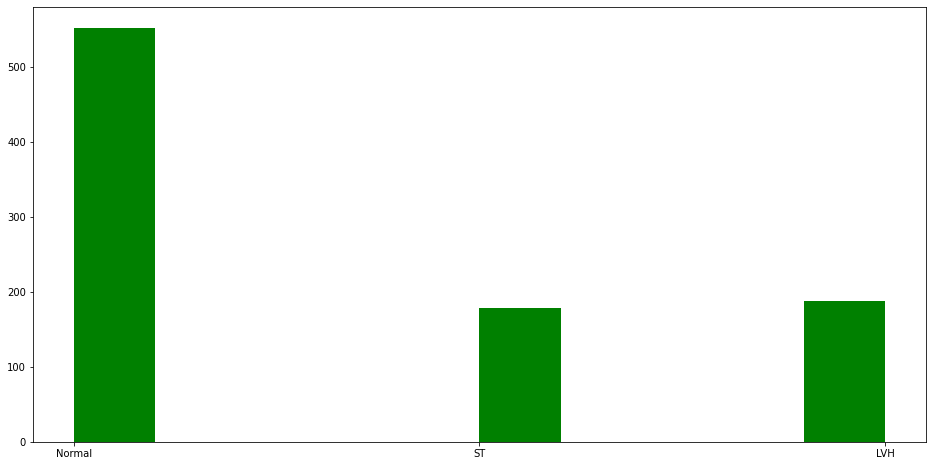

In [65]:
plt.figure(figsize = (16,8))
plt.hist(data["RestingECG"],color='green')

### Unique values to aid backend

In [66]:
s = data["Sex"].unique()
c = data["ChestPainType"].unique()
r = data["RestingECG"].unique()
e = data["ExerciseAngina"].unique()
sl = data["ST_Slope"].unique()

In [67]:
print(s)
print(c)
print(r)
print(e)
print(sl)

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


### Label Encoding

In [68]:
labelencoder = LabelEncoder()
data["Sex"] = labelencoder.fit_transform(data["Sex"])

In [69]:
data["ChestPainType"] = labelencoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = labelencoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = labelencoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = labelencoder.fit_transform(data["ST_Slope"])

In [70]:
s = data["Sex"].unique()
c = data["ChestPainType"].unique()
r = data["RestingECG"].unique()
e = data["ExerciseAngina"].unique()
sl = data["ST_Slope"].unique()

In [71]:
print(s)
print(c)
print(r)
print(e)
print(sl)

[1 0]
[1 2 0 3]
[1 2 0]
[0 1]
[2 1 0]


In [72]:

#label = data["HeartDisease"].copy()

data["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingBP'>

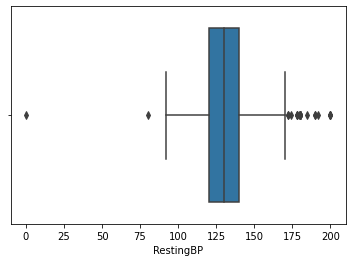

In [73]:
sns.boxplot(data["RestingBP"])

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cholesterol'>

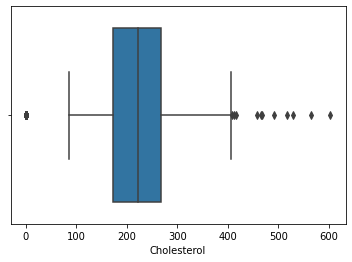

In [74]:
sns.boxplot(data["Cholesterol"])

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxHR'>

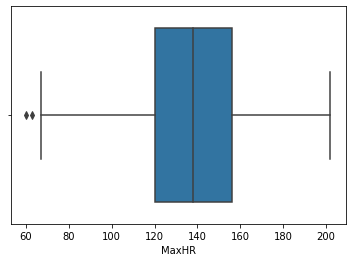

In [75]:
sns.boxplot(data["MaxHR"])

In [76]:
#### Remove the outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
IQR

Age               13.00
Sex                0.00
ChestPainType      2.00
RestingBP         20.00
Cholesterol       93.75
FastingBS          0.00
RestingECG         0.00
MaxHR             36.00
ExerciseAngina     1.00
Oldpeak            1.50
ST_Slope           1.00
HeartDisease       1.00
dtype: float64

In [77]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]
data.shape

(278, 12)

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingBP'>

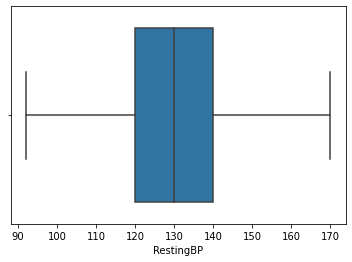

In [78]:
sns.boxplot(data["RestingBP"])

In [79]:
label = data["HeartDisease"].copy()
data = data.drop("HeartDisease",axis=1)

#### Train Test Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 42)


In [81]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [82]:
lor = LogisticRegression()
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87        29\n           1       0.88      0.81      0.85        27\n\n    accuracy                           0.86        56\n   macro avg       0.86      0.86      0.86        56\nweighted avg       0.86      0.86      0.86        56\n'

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


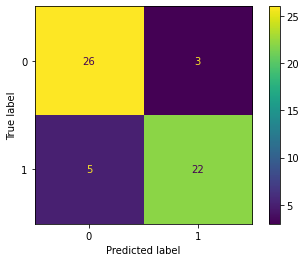

In [83]:
plot_confusion_matrix(lor,X_test,y_test)
plt.show()  

In [84]:
#printing the accuracy for test set
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of Logistic Regression model is 85.71428571428571


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


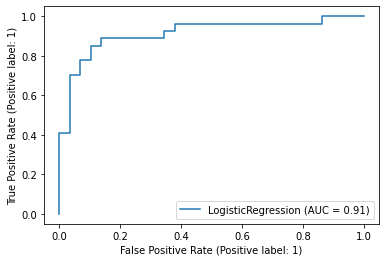

In [85]:
metrics.plot_roc_curve(lor, X_test, y_test)

#### Decision Tree

In [86]:
mdl = DecisionTreeClassifier(criterion="entropy", max_depth=6)
mdl.fit(X_train,y_train)
y_p = mdl.predict(X_test)


In [87]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.92      0.89      0.91        27

    accuracy                           0.91        56
   macro avg       0.91      0.91      0.91        56
weighted avg       0.91      0.91      0.91        56



/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


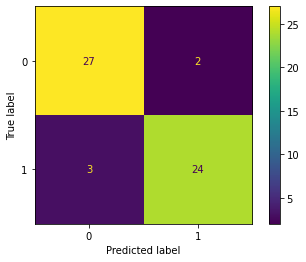

In [88]:
plot_confusion_matrix(mdl,X_test,y_test)
plt.show()  

In [89]:
# printing the accuracy for test set
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,y_p)*100))

Accuracy of Decision Tree model is 91.07142857142857


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


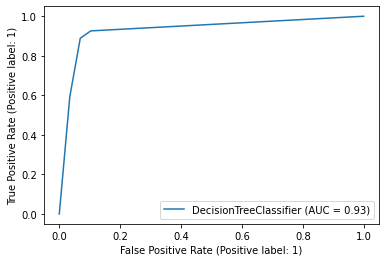

In [90]:
metrics.plot_roc_curve(mdl, X_test, y_test)

#### Random Forest

In [91]:
clf = RandomForestClassifier(n_estimators =100)
clf.fit(X_train, y_train)
pp = clf.predict(X_test)

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


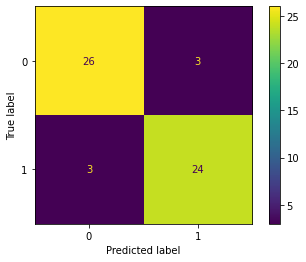

In [92]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()  

In [93]:
# printing the accuracy for test set
print('Accuracy of Random forest classifier model is {}'.format(accuracy_score(y_test,pp)*100))

Accuracy of Random forest classifier model is 89.28571428571429


/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


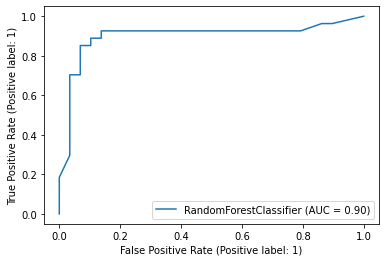

In [94]:
metrics.plot_roc_curve(clf, X_test, y_test)